<a href="https://colab.research.google.com/github/andreahammer/Multiclassification-on-images/blob/main/ClassificationCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pre-trained CNN med CIFAR-10**

I denne oppgaven skal vi trene et convolutional neural network som en binær klassifikator av en kategori som finnes i CIFAR-10 datasettet. Vi brukte en pre-trained CNN. Til slutt lastet vi opp egne bilder fra forskjellige typer kategorier, og brukte modellen til å klassifisere om bildet var en del av den valgte kategorien eller ikke.

### Plan

Først ønsket vi å finne et godt pre-trained CNN som passer til bildeklassifisering. Vårt valgt falt på VGG16. Det ble dette nettverket fordi det var enkelt å forstå oppbygningen, og det er et godt trent nettverk. Det er tidligere trent på datasettet "imagenet". Kategorien vi ønsker å klassifisere er hund. Videre prøvde vi forskjellige strategier i modellene for å se hva som ga best accuracy, og ikke overfittet. Vi lagde derfor tre modeller, der vi prøvde det helt enkle, en der vi bruker data augmentation, og en der vi unfreezer lag.


# **Modell 1 - enkel**
Den første modellen som vi prøver ut er den enkleste modellen av de tre. Her preprocesses datasettet, og bruker VGG16 modellen, og legger kun til noen ekstra lag. Vi fryser også de allerede trente lagene.

### Importerer nødvendig biblioteker

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

### Laster inn datasett

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


Velger kategori man ønsker å klassifisere

In [ ]:
# Choose class
positive_class = 5 # 'dog' category

In [ ]:
# Preprocess
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_labels = (train_labels == positive_class).astype('int32')
test_labels = (test_labels == positive_class).astype('int32')

Splitter data inn i trening, validering og test sett.

In [ ]:
# Split into training, validation, and test sets
val_images, test_images = test_images[:2500], test_images[2500:]
val_labels, test_labels = test_labels[:2500], test_labels[2500:]

Visualiserer hvordan man kan forvente at datasettet ser ut.

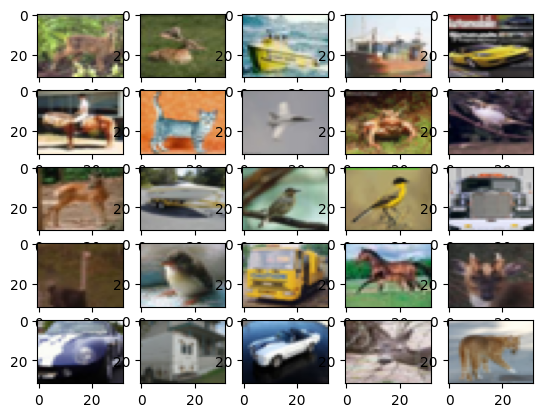

In [ ]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(test_images[k], aspect='auto')
        k += 1

plt.show()

### VGG16

Vi velger VGG16, og legger til noen ekstra lag på toppen.

VGG16 er et convolutional neural network som brukes til gjenkjenning av bilder. VGG16 er enkel fordi det bare har 16 lag. VGG16 har en dyp arkitektur som gjør at den kan lære komplekse bilder. Den plukker og abstrakte egenskaper, som hjelper med nøyaktigheten til modellen.
[1]



In [ ]:
base_model = keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3))
model1 = keras.models.Sequential([base_model, keras.layers.GlobalAveragePooling2D(),keras.layers.Dense(1, activation='sigmoid')])

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

Kompilerer modellen før trening. Setter parametere som optimizer, loss og metrics.

In [ ]:
# Compile model
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.BinaryCrossentropy(from_logits=False), metrics=[keras.metrics.BinaryAccuracy()])


**Early stopping**

Teknikk brukt for å unngå overfitting i treningsdataen. Det fungerer ved å stoppe treningen av modellen tidligere enn satte epochs, når val_loss ikke lenger forbedrer seg. Det er en god teknikk for å unngå overfitting, spare tid og ressurser ved å ikke trene modellen lenger enn nødvendig.
[2] [3]

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# Train model
history = model1.fit(train_images, train_labels, epochs=1000, batch_size=32, validation_data=(val_images, val_labels), callbacks=[callback],verbose=1)

Epoch 1/1000
1563/1563 [==============================] - 33s 12ms/step - loss: 0.2508 - binary_accuracy: 0.9079 - val_loss: 0.2299 - val_binary_accuracy: 0.9096
Epoch 2/1000
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2280 - binary_accuracy: 0.9137 - val_loss: 0.2245 - val_binary_accuracy: 0.9120
Epoch 3/1000
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2230 - binary_accuracy: 0.9156 - val_loss: 0.2216 - val_binary_accuracy: 0.9116
Epoch 4/1000
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2204 - binary_accuracy: 0.9159 - val_loss: 0.2178 - val_binary_accuracy: 0.9144
Epoch 5/1000
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2187 - binary_accuracy: 0.9168 - val_loss: 0.2171 - val_binary_accuracy: 0.9156
Epoch 6/1000
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2174 - binary_accuracy: 0.9170 - val_loss: 0.2172 - val_binary_accuracy: 0.9148
Epoch 7/1000
1563/1563 [=========

Evaluerer modellen

In [ ]:
test_loss, test_acc1 = model1.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc1)

235/235 [==============================] - 2s 9ms/step - loss: 0.2190 - binary_accuracy: 0.9183
Test accuracy: 0.9182666540145874


### Visualisering av resultater modell 1

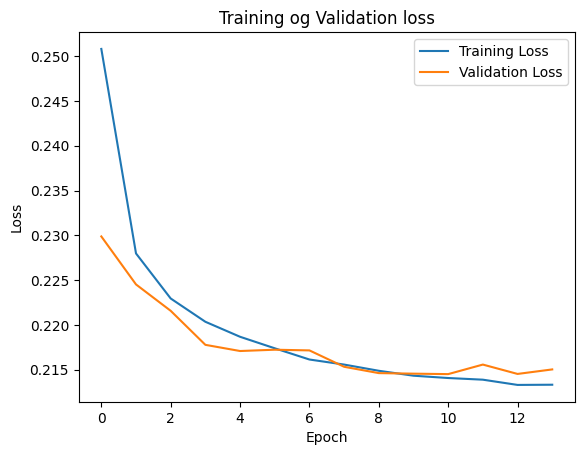

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training og Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


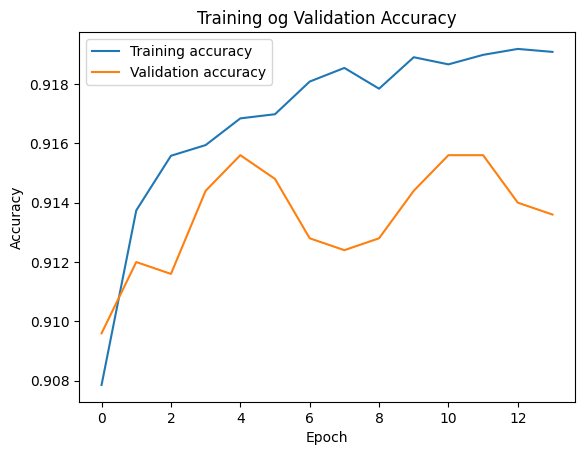

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['binary_accuracy'], label='Training accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation accuracy')
plt.title('Training og Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Resultater modell 1

Loss: gjennomsnittstapet til modellen på treningssettet er 0.2133. Måler hvor godt modellen tilpasser seg treningsdataene.

Binary_accuracy: nøyaktigheten til modellen på treningssettet er 91.91%. Måler hvor mange av treningssettets eksempler modellen klassifiserte riktig.

Val_loss: gjennomsnittstapet til modellen på valideringssettet er 0.2150. Måler hvor godt modellen generaliserer til nye data.

Val_binary_accuracy: nøyaktigheten til modellen på valideringssettet er 91.36%. Måler hvor mange av valideringssettets eksempler modellen klassifiserte riktig.

Modellen presterer bra på både trening og validation sett, med litt bedre score på treningssettet. Det er liten forskjell mellom trening accuracy og validation accuracy, som viser at modellen ikke overfitter.

#**Modell 2 - Data augmentation**
I modell 2 gjøres det noen endringer på datasettet for å se om det gjør noe med nøyaktigheten. Data augmentation bruker original data med noen små endringer. Man speiler, endrer størrelse, beskjærer, endrer lysstryke og kontrast, for å øke størrelsen og variasjonen i treningssettet. [4]

### Importerer nødvendig biblioteker

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt

In [ ]:
#load cifar-10 dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [ ]:
#choose category
positive_class = 5 #dog

In [ ]:
# Preprocess images
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_labels = (train_labels == positive_class).astype('int32')
test_labels = (test_labels == positive_class).astype('int32')

Preprocessing av bildene ved hjelp av innebygd funksjon i keras og VGG16. VGG16 forventer at input bildet er i et spesifikt format. Funksjonen normaliserer inngangsbildene slik at modellen kan behandle dem riktig.

In [ ]:
train_images = tf.keras.applications.vgg16.preprocess_input(train_images, data_format=None)
test_images = tf.keras.applications.vgg16.preprocess_input(test_images, data_format=None)

### Data augmentation

In [ ]:
# Define data augmentation settings
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    brightness_range=[0.8, 1.2],
    channel_shift_range=50.0,
    preprocessing_function=preprocess_input
)

In [ ]:
# Preprocess training and validation data with data augmentation
train_generator = train_datagen.flow(
    train_images,
    train_labels,
    batch_size=32)

In [ ]:
positive_class = 5 # 'dog' category

In [ ]:
# Split into training, validation, and test sets
val_images, test_images = test_images[:2500], test_images[2500:]
val_labels, test_labels = test_labels[:2500], test_labels[2500:]


In [ ]:
# Define CNN architecture
base_model = keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3))
model2 = keras.models.Sequential([base_model, keras.layers.GlobalAveragePooling2D(),keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile model
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.BinaryCrossentropy(from_logits=False), metrics=[keras.metrics.BinaryAccuracy()])


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
history = model2.fit(train_generator, epochs=1000, validation_data=(val_images, val_labels), callbacks=[callback],verbose=1)

Epoch 1/1000
1563/1563 [==============================] - 87s 55ms/step - loss: 0.3283 - binary_accuracy: 0.9000 - val_loss: 1.4172 - val_binary_accuracy: 0.9032
Epoch 2/1000
1563/1563 [==============================] - 95s 61ms/step - loss: 0.3259 - binary_accuracy: 0.9000 - val_loss: 1.4845 - val_binary_accuracy: 0.9032
Epoch 3/1000
1563/1563 [==============================] - 77s 49ms/step - loss: 0.3258 - binary_accuracy: 0.9000 - val_loss: 1.5386 - val_binary_accuracy: 0.9032
Epoch 4/1000
1563/1563 [==============================] - 73s 46ms/step - loss: 0.3258 - binary_accuracy: 0.9000 - val_loss: 1.7918 - val_binary_accuracy: 0.9032


In [ ]:
# Evaluate model
test_loss, test_acc2 = model2.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc2)

235/235 [==============================] - 2s 8ms/step - loss: 1.8692 - binary_accuracy: 0.8989
Test accuracy: 0.8989333510398865


### Visualisering av resultater modell 2

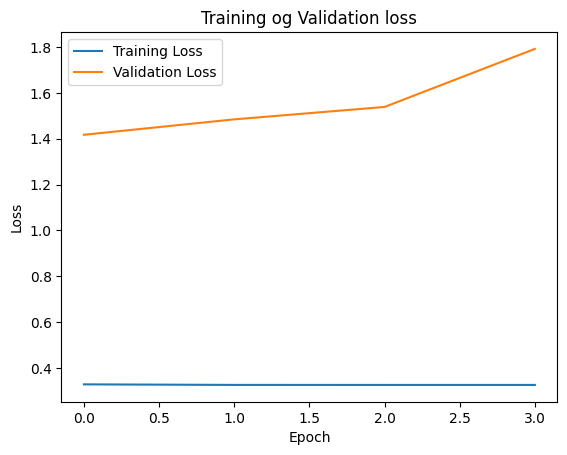

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training og Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

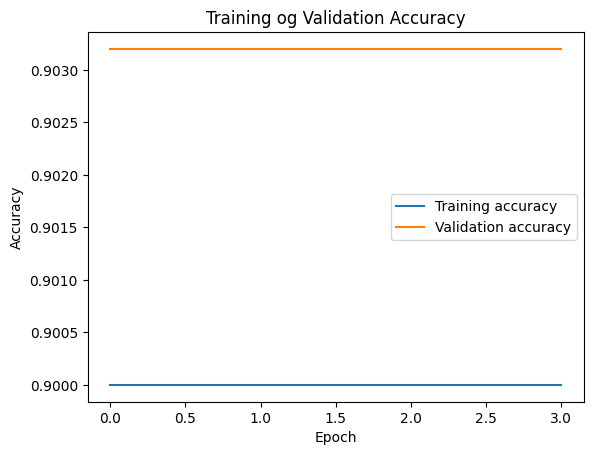

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['binary_accuracy'], label='Training accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation accuracy')
plt.title('Training og Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Resultater modell 2
Loss: gjennomsnittstapet til modellen på treningssettet er 0.3258.

Binary_accuracy: nøyaktigheten til modellen på treningssettet er 90.00%.

Val_loss: gjennomsnittstapet til modellen på valideringssettet er 1.8692.

Val_binary_accuracy: nøyaktigheten til modellen på valideringssettet er 90.32%.

Modellen har en lavere nøyaktighet på treningssettet sammenlignet med modell 1, men den har fortsatt en ganske høy accuracy på både trenings- og valideringssettet. Det ser ut som modellen overfitter dataene siden val_loss er veldig mye høyere enn loss, noe som indikerer at modellen har problemer med å generalisere til nye data. Dette betyr at prestasjonen til modellen kan være dårlig når den brukes til å klassifisere nye og usette bilder.

# **Modell 3 - fryse lag**

Når man har brukt en pre-trained modell som VGG16, inneholder den allerede vekter som er trent på store datasett som gjør den god på å trekke ut detaljer fra bildene.

For å unngå overfitting, kan man fryse lagene som allerede er trent og kun trene de nye lagene som man legger til på toppen av modellen. Dette vil la oss utnytte læringen fra tidligere lag, og samtidig unngå overfitting.

Ved å sette layer.trainable = False for alle lag, vil ikke disse vektene bli oppdatert under trening.


In [ ]:
#importing libaries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [ ]:
#choose category
positive_class = 5 # 'dog' category

In [ ]:
# Preprocess images
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_labels = (train_labels == positive_class).astype('int32')
test_labels = (test_labels == positive_class).astype('int32')

In [ ]:
# Split into training, validation, and test sets
val_images, test_images = test_images[:2500], test_images[2500:]
val_labels, test_labels = test_labels[:2500], test_labels[2500:]

In [ ]:
# Define CNN architecture
base_model = keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3))
model3 = keras.models.Sequential([base_model, keras.layers.GlobalAveragePooling2D(),keras.layers.Dense(1, activation='sigmoid')])

### Unfreeze lag


In [ ]:
#freeze top layers
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze the top layers
for layer in base_model.layers[:4]:
    layer.trainable = True

In [ ]:
# Compile model
model3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.BinaryCrossentropy(from_logits=False), metrics=[keras.metrics.BinaryAccuracy()])


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
history = model3.fit(train_images, train_labels, epochs=1000, batch_size=32, validation_data=(val_images, val_labels), callbacks=[callback],verbose=1)

Epoch 1/1000
1563/1563 [==============================] - 31s 17ms/step - loss: 0.2488 - binary_accuracy: 0.9075 - val_loss: 0.2165 - val_binary_accuracy: 0.9152
Epoch 2/1000
1563/1563 [==============================] - 26s 17ms/step - loss: 0.2169 - binary_accuracy: 0.9166 - val_loss: 0.2086 - val_binary_accuracy: 0.9140
Epoch 3/1000
1563/1563 [==============================] - 26s 17ms/step - loss: 0.2089 - binary_accuracy: 0.9196 - val_loss: 0.2007 - val_binary_accuracy: 0.9192
Epoch 4/1000
1563/1563 [==============================] - 26s 17ms/step - loss: 0.2005 - binary_accuracy: 0.9221 - val_loss: 0.1910 - val_binary_accuracy: 0.9252
Epoch 5/1000
1563/1563 [==============================] - 26s 17ms/step - loss: 0.1960 - binary_accuracy: 0.9236 - val_loss: 0.1914 - val_binary_accuracy: 0.9204
Epoch 6/1000
1563/1563 [==============================] - 26s 17ms/step - loss: 0.1901 - binary_accuracy: 0.9252 - val_loss: 0.1859 - val_binary_accuracy: 0.9292
Epoch 7/1000
1563/1563 [====

In [ ]:
# Evaluate model
test_loss, test_acc3 = model3.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc3)

235/235 [==============================] - 2s 8ms/step - loss: 0.1643 - binary_accuracy: 0.9373
Test accuracy: 0.937333345413208


###Visualisering av resultater modell 3

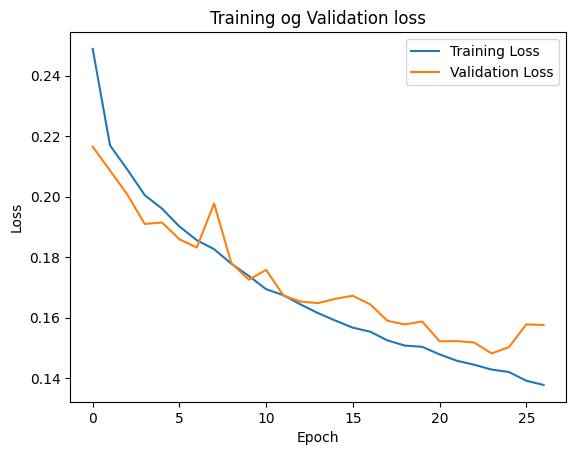

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training og Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

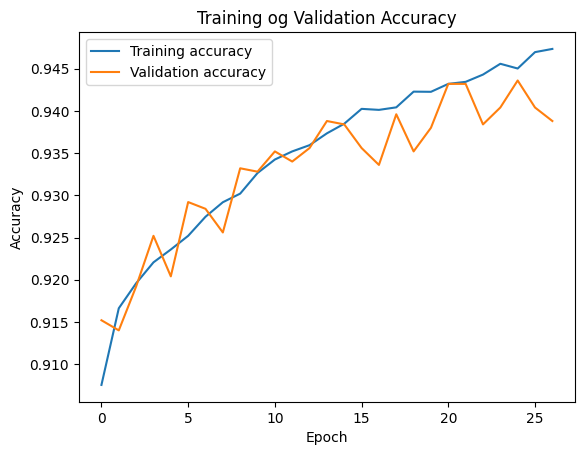

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['binary_accuracy'], label='Training accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation accuracy')
plt.title('Training og Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Resultater av modell 3

Loss: viser gjennomsnittstapet til modellen på treningssettet er 0.1378.

Binary_accuracy: viser nøyaktigheten til modellen på treningssettet er 94.73%.

Val_loss: viser gjennomsnittstapet til modellen på valideringssettet er 0.1576.

Val_binary_accuracy: viser nøyaktigheten til modellen på valideringssettet er 93.88%.

Modellen har høy accuracy på både trenings- og valideringssettet, og både loss og val_loss er lave, noe som sier at modellen presterer godt til nye data. Dette betyr at modellen sannsynligvis vil være god når den brukes til å klassifisere nye og usette bilder.

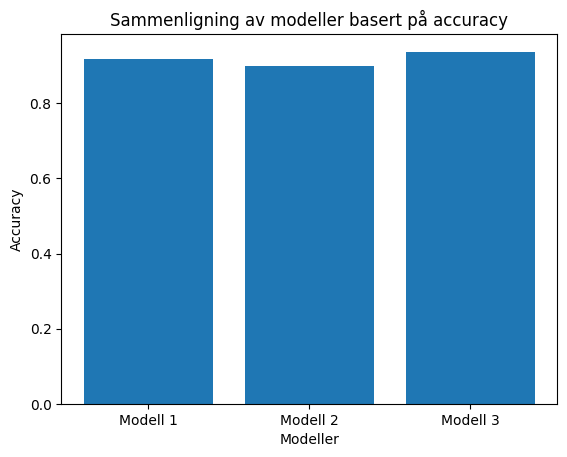

In [ ]:
data = [test_acc1, test_acc2, test_acc3]
labels = ['Modell 1','Modell 2', 'Modell 3']

plt.bar(labels, data)

plt.title('Sammenligning av modeller basert på accuracy')
plt.xlabel('Modeller')
plt.ylabel('Accuracy')

plt.show()

### Nye bilder brukt for å klassifisere kategori (png-bilder)
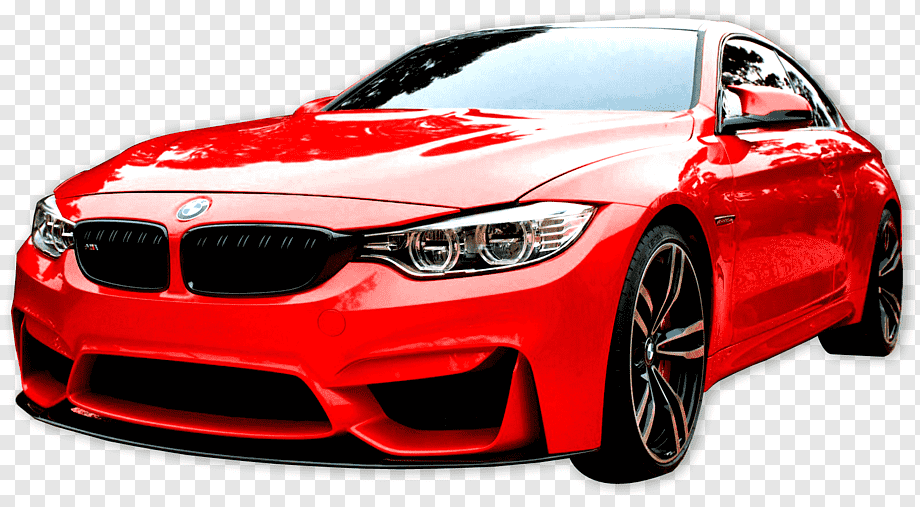


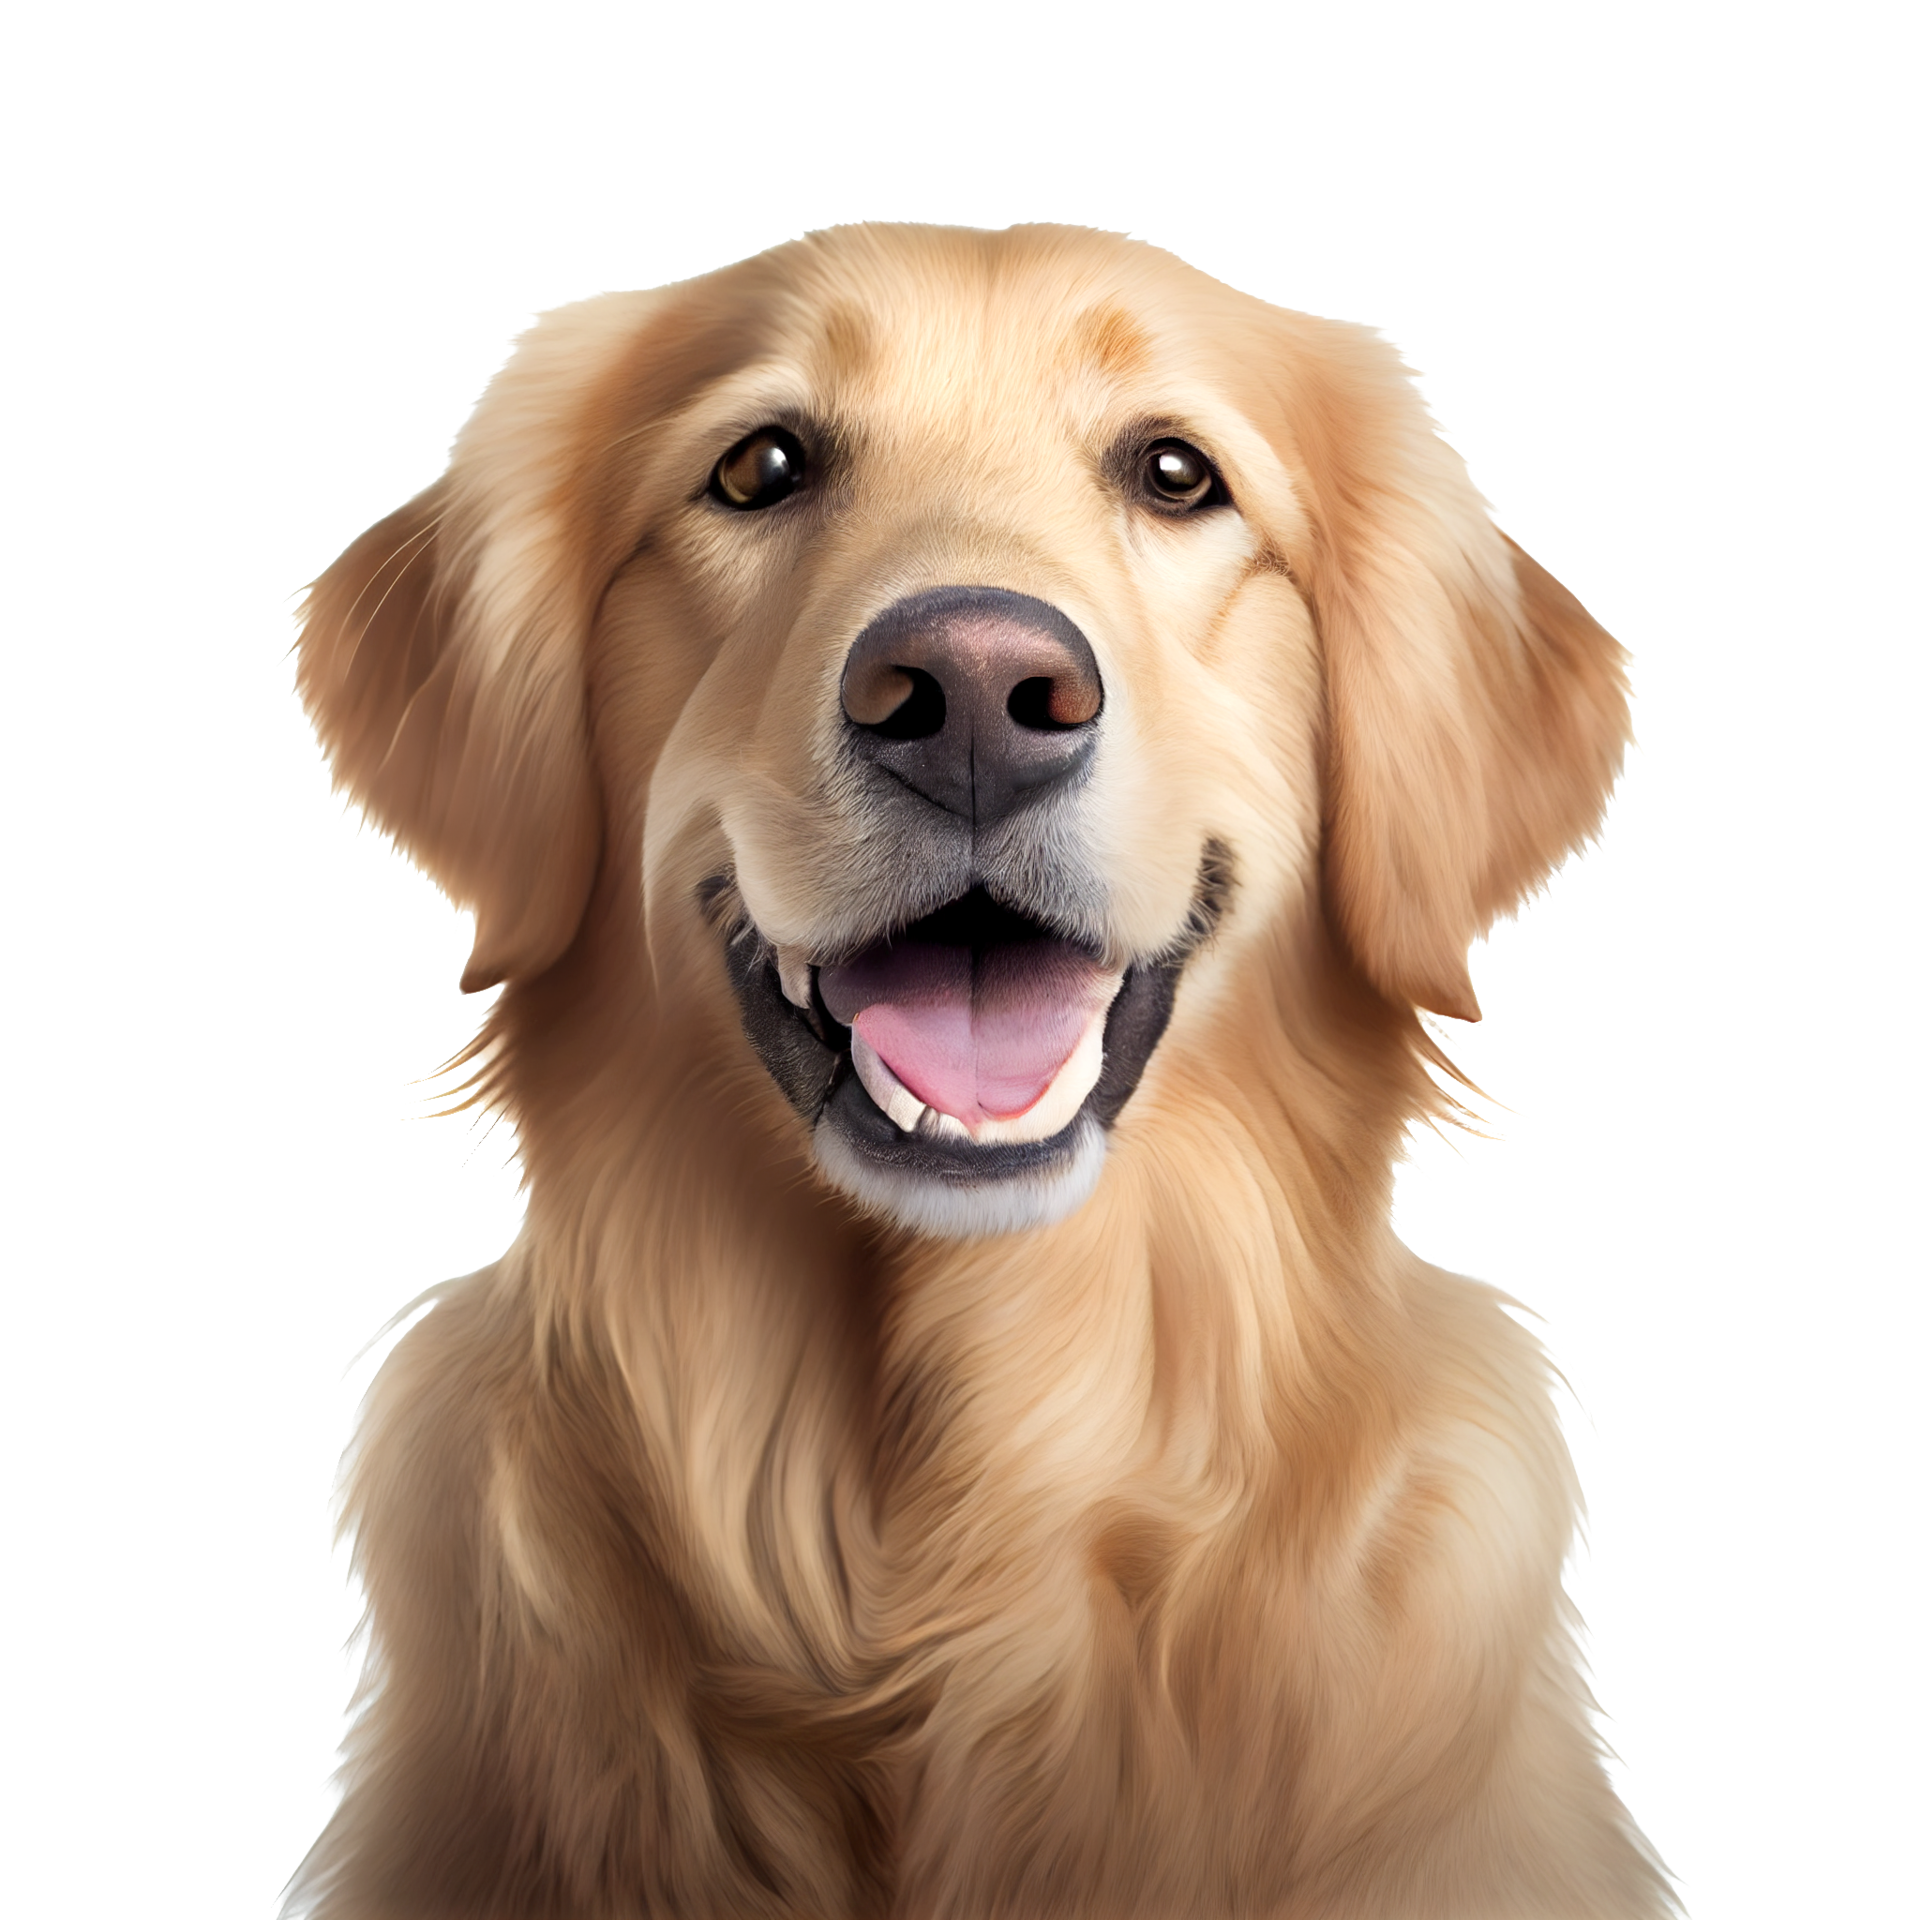

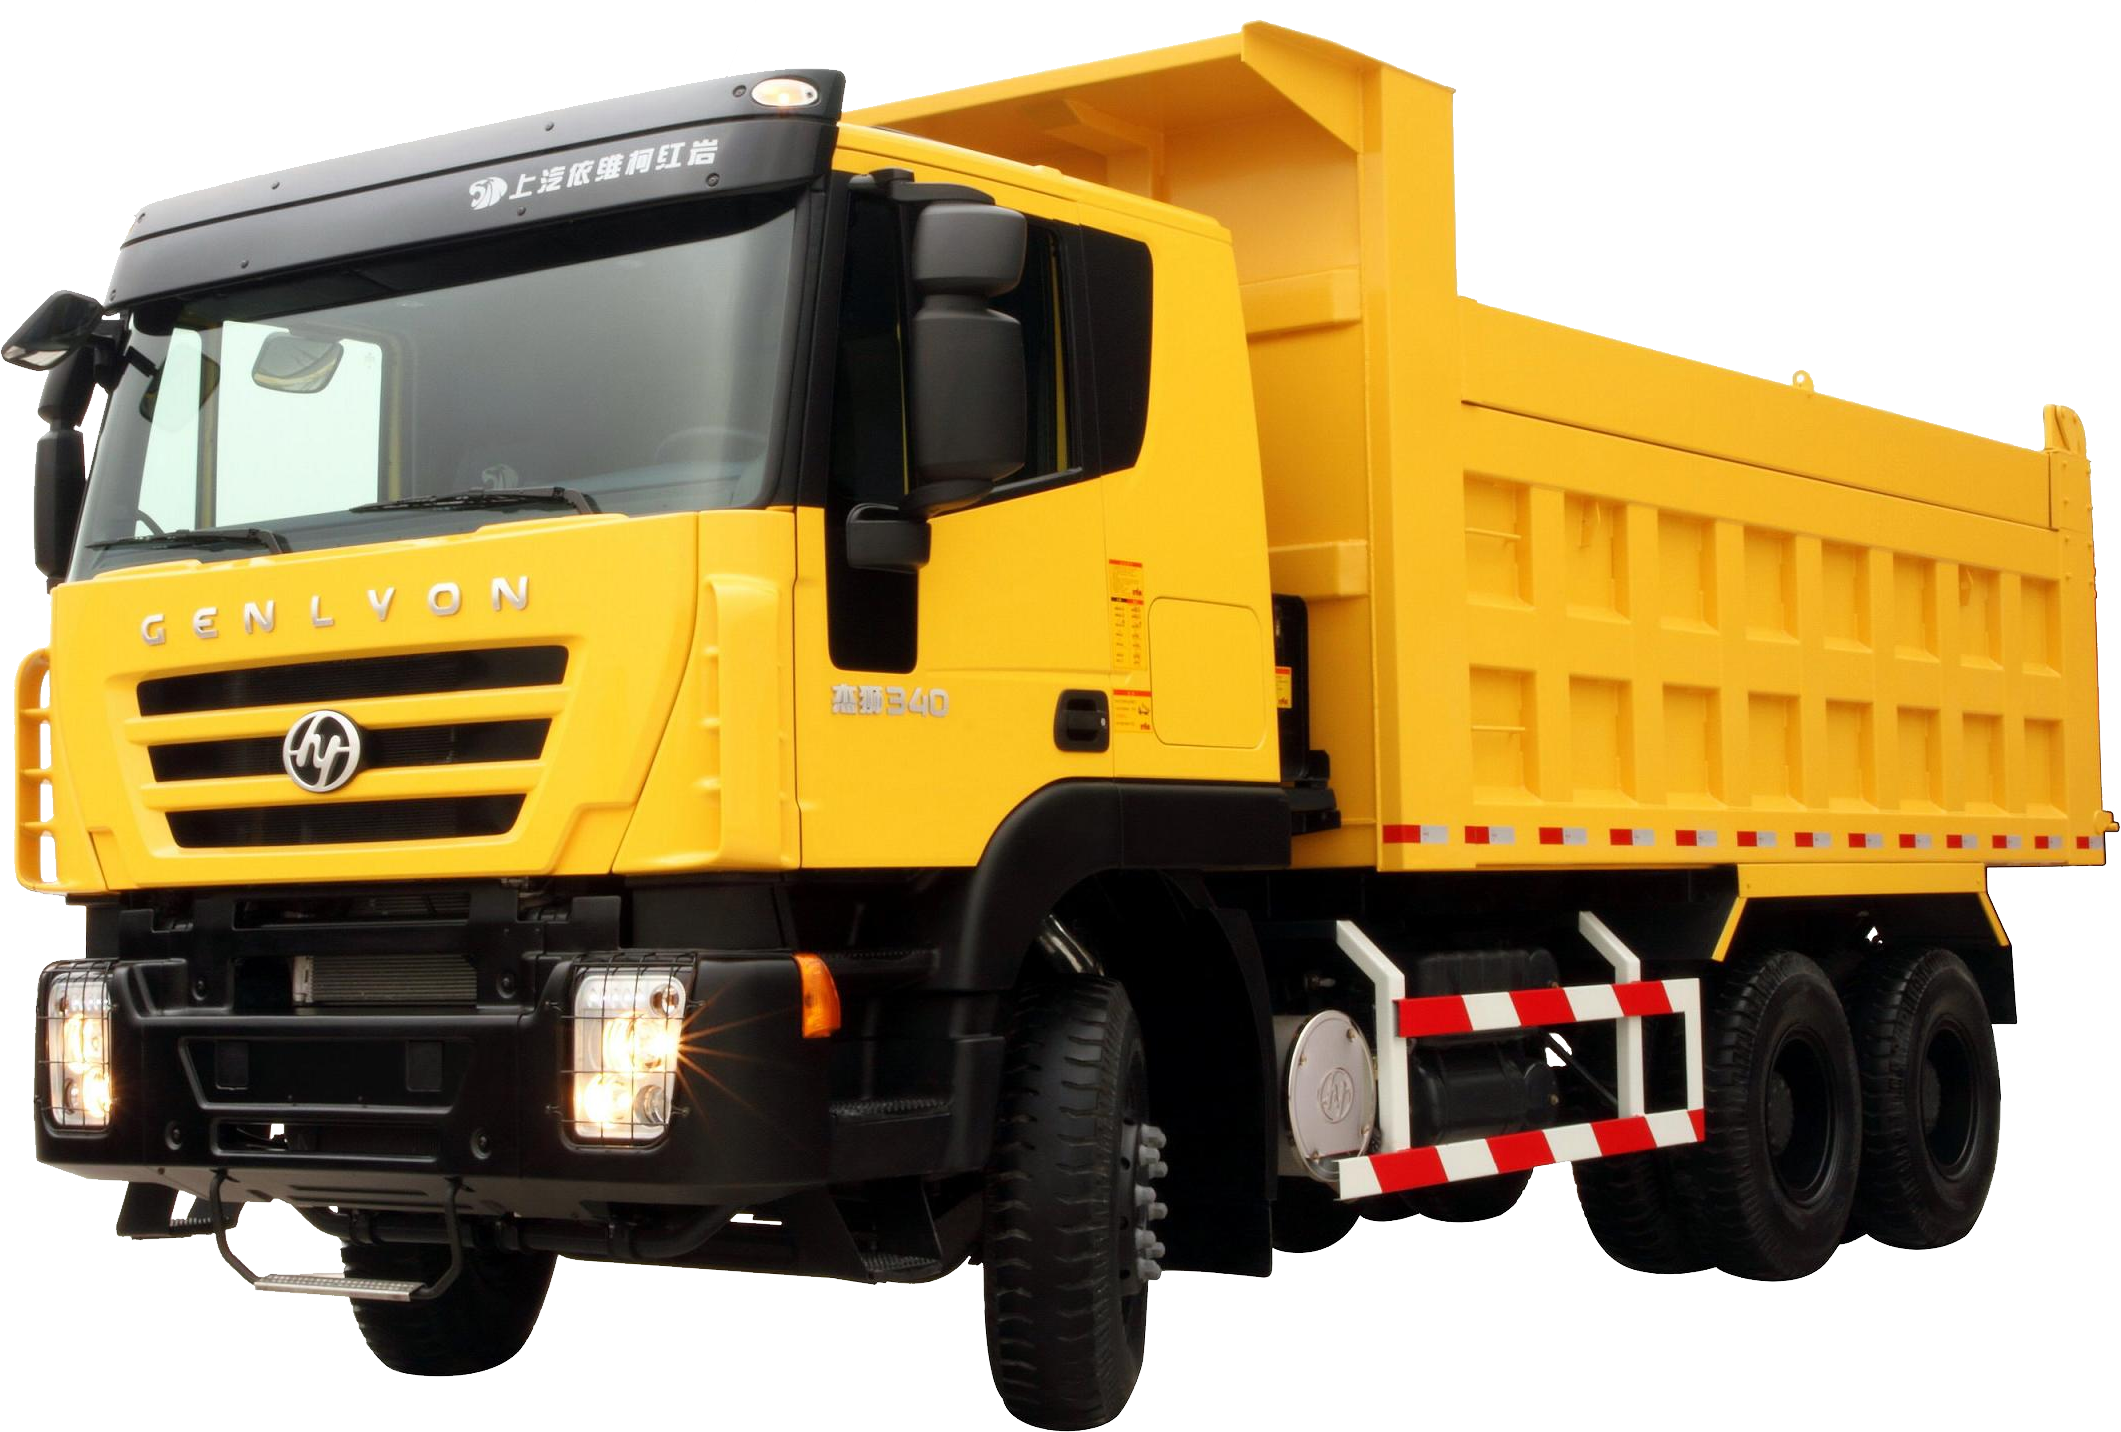

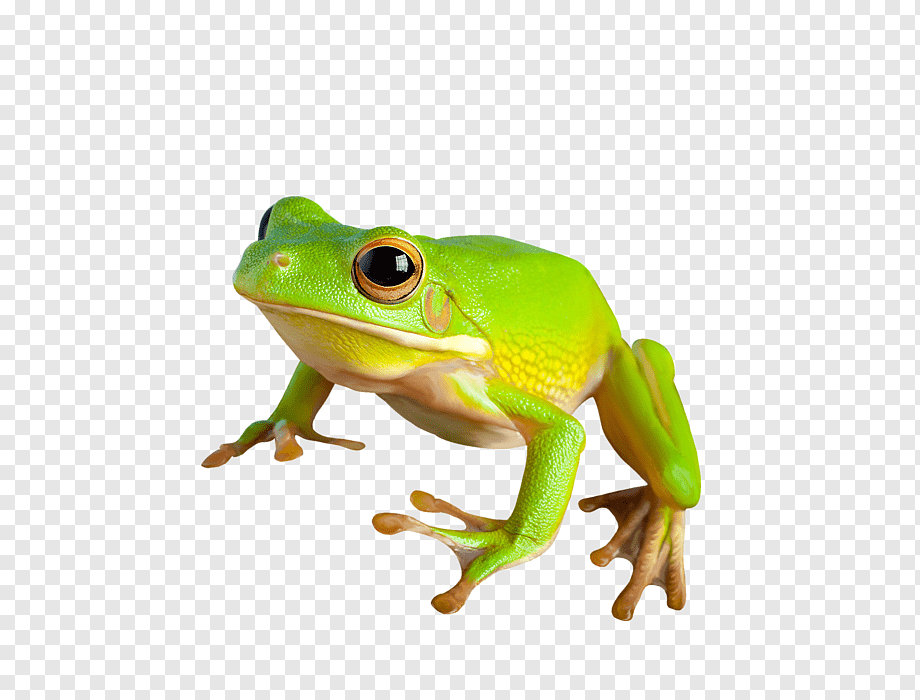

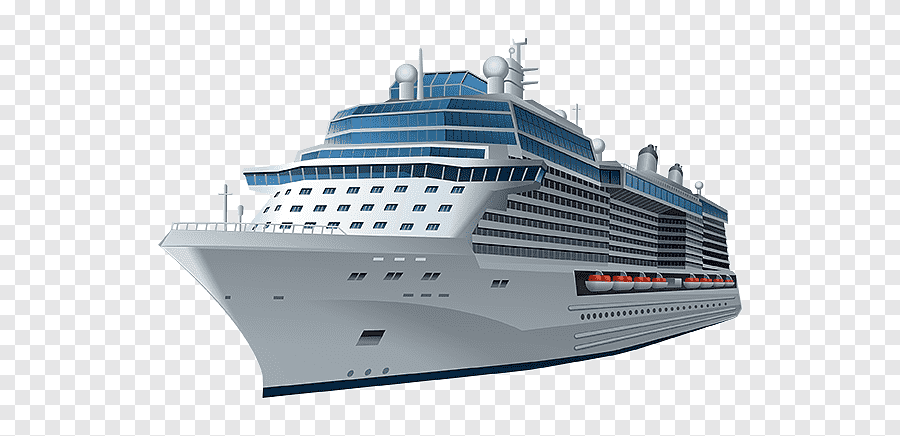

### Bruke modellen til å klassifisere nytt bilde, velger beste modell til predikering (modell 3)

In [ ]:
# Use model to classify a new image
image = keras.preprocessing.image.load_img('bil.png', target_size=(32, 32))
image = keras.preprocessing.image.img_to_array(image)
image = image.astype('float32') / 255.0
image = tf.expand_dims(image, 0)
pred = model3.predict(image)
if pred >= 0.5:
    print('Bildet er en hund')
else:
    print('Bildet er ikke en hund')


1/1 [==============================] - 0s 375ms/step
Bildet er ikke en hund


Viser bildet som modellen fikk som input

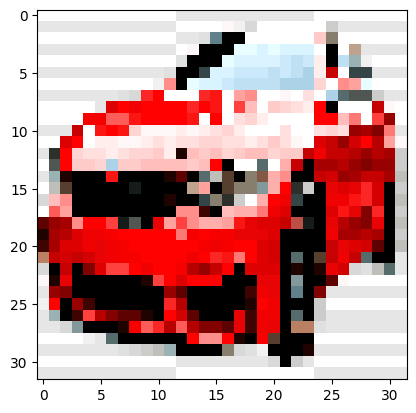

In [ ]:
plt.imshow(image[0])
plt.show()

In [ ]:
# Use model to classify a new image
image = keras.preprocessing.image.load_img('dog4-png.webp', target_size=(32, 32))
image = keras.preprocessing.image.img_to_array(image)
image = image.astype('float32') / 255.0
image = tf.expand_dims(image, 0)
pred = model3.predict(image)
if pred >= 0.5:
    print('Bildet er en hund')
else:
    print('Bildet er ikke en hund')

1/1 [==============================] - 0s 24ms/step
Bildet er ikke en hund


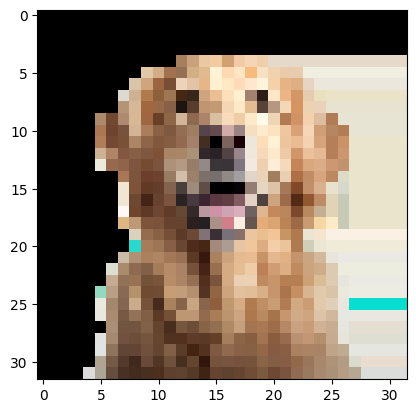

In [ ]:
plt.imshow(image[0])
plt.show()

# **Konklusjon**
For å oppsummere de tre modellene som ble prøvd ut, var det modell 3 som kom best ut. Den hadde høyest accuracy. Samtidig var det ikke veldig store forskjeller mellom modell 1 og 2 med tanke på nøyaktighet. Det var interessant å se at modell 2 var overfittet, ved bruk av data augmentation. Det var innsiktsfullt å visualisere prestasjonen av de forskjellige modellene med grafer, da det ga innsyn på hvordan type graf man ønsker å oppnå. For eksempel hadde grafene til modell 2 stor forskjell, og fulgte ikke hverandre gjennom grafen. Dette var mer tilfelle i modell 1 og 3. Å gjøre forskjellige taktikker på de forskjellige modellene ga innsyn på hvilke justeringer man kan gjøre. Det viser også hvor forskjellig presisjon og nøyaktighet man kan oppnå.

In [ ]:
#lagret modellene ved model.save gjennom utførelse av oppgaven, men ønsket ikke å ha med dette i innlevering.

# **Kilder**

[1] Thakur, Rohit. BuiltIn. (2023) https://builtin.com/machine-learning/vgg16

[2] Rohith, Muttineni. Towards AI. (2022) https://pub.towardsai.net/keras-earlystopping-callback-to-train-the-neural-networks-perfectly-2a3f865148f7

[3] Brownlee, Jason. Machine Learning Mastery. (2018)  https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

[4] https://www.datacamp.com/tutorial/complete-guide-data-augmentation